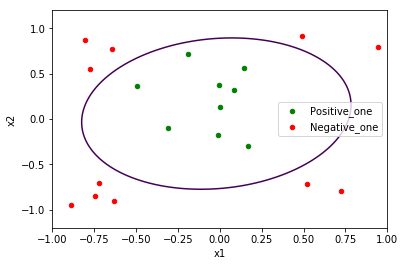

(10, 20)


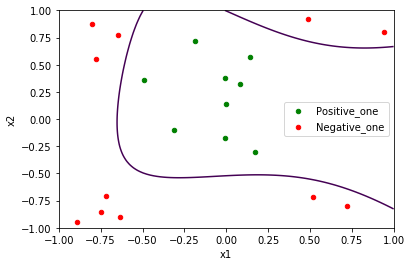

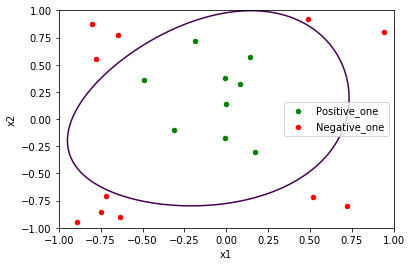

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from pandas.plotting import radviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# part a and b
# Data points with label 1

data1 = {'x1': [-0.494, -0.311, -0.0064, -0.0089, 0.0014, -0.189, 0.085,0.171,0.142], 'x2':[0.363,-0.101,0.374,-0.173,0.138,0.718, 0.32208,-0.302,0.568]}
label_plus_1 = pd.DataFrame(data=data1)

# Data points with label -1

data2 = {'x1': [0.491,-0.892,-0.721,0.519,-0.775,-0.646,-0.803,0.944,0.724,-0.748,-0.635], 'x2': [0.920,-0.946, -0.710,-0.715,0.551,0.773,0.878,0.801,-0.795,-0.853,-0.905]}
label_minus_1 = pd.DataFrame(data = data2)

# Scatter plot of the whole dataset

ax = label_plus_1.plot.scatter(x='x1', y='x2', color = 'green',label = 'Positive_one');
label_minus_1.plot.scatter(x='x1', y='x2', color='red', label='Negative_one', ax=ax);

# Feature transformation using second degree polynomial for data points with label 1

two_poly_positive=PolynomialFeatures(degree=2)
poly_two_positive=two_poly_positive.fit_transform(label_plus_1)
Poly_two_positive = pd.DataFrame(poly_two_positive)

# Feature transformation using second degree polynomial for data points with label -1

two_poly_negative=PolynomialFeatures(degree=2)
poly_2_negative=two_poly_negative.fit_transform(label_minus_1)
Poly_2_negative = pd.DataFrame(poly_2_negative)

 # Combined both the transformations 
frames = [Poly_two_positive,Poly_2_negative]

 # Applying Linear Regression to the the second order tranformation to get the weights of the variables
X = pd.concat(frames)
X
X_psudo = np.matmul((np.linalg.inv(np.matmul(np.transpose(X),X))),np.transpose(X))
X_psudo = pd.DataFrame(X_psudo)
target = pd.DataFrame({'y': [1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]})
target

W_lin = np.matmul(X_psudo,target)
W_lin
W_lin = pd.DataFrame(W_lin)

# Plotting the final curve
x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.2, 1.2, 100)
X, Y = np.meshgrid(x,y)
F = 1.149612 -0.100091*X + 0.212156*Y -1.810920*X**2 + 0.398584*X*Y -1.680980*Y**2
plt.contour(X,Y,F,[0])
plt.show()

# Third Degree Transformation 


three_poly_positive=PolynomialFeatures(degree=3)
poly_3_positive=three_poly_positive.fit_transform(label_plus_1)
Poly_3_positive = pd.DataFrame(poly_3_positive)


three_poly_negative=PolynomialFeatures(degree=3)
poly_3_negative=three_poly_negative.fit_transform(label_minus_1)
Poly_3_negative = pd.DataFrame(poly_3_negative)

frames = [Poly_3_positive,Poly_3_negative]

X1 = pd.concat(frames)
X1
X1_psudo = np.matmul((np.linalg.inv(np.matmul(np.transpose(X1),X1))),np.transpose(X1))
X1_psudo = pd.DataFrame(X1_psudo)
print(X1_psudo.shape)


W_lin2 = np.matmul(X1_psudo,target)
W_lin2
W_lin2 = pd.DataFrame(W_lin2)

# Plotting the Curve in 2-D 

ax = label_plus_1.plot.scatter(x='x1', y='x2', color = 'green',label = 'Positive_one');
label_minus_1.plot.scatter(x='x1', y='x2', color='red', label='Negative_one', ax=ax);

x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(x,y)
F = 1.200496 + 0.418594*X + 0.862577*Y - 0.855806*X**2 +  0.096499*X*Y  -2.529297*Y**2+2.033717*X**3 -2.014001*X**2*Y-2.468884*X*Y**2 +0.451103*Y**3
plt.contour(X,Y,F,[0])
plt.show()

# part c
# Regulrization
# I found 3rd order transformation more overfitting the data compare to 2nd order transformation

I = np.identity(10)

X1_reg = np.matmul(np.linalg.inv(np.matmul(np.transpose(X1),X1)-I),np.transpose(X1))
X1_reg = pd.DataFrame(X1_reg)
w_reg = np.matmul(X1_reg, target)
w_reg = pd.DataFrame(w_reg)


ax = label_plus_1.plot.scatter(x='x1', y='x2', color = 'green',label = 'Positive_one');
label_minus_1.plot.scatter(x='x1', y='x2', color='red', label='Negative_one', ax=ax);

x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(x,y)
F = 2.397046 + -0.461436*X + 0.523517*Y -3.712683*X**2 +  1.353682*X*Y  -3.188038*Y**2+ -0.421875*X**3 -0.777534*X**2*Y+0.473305*X*Y**2 +0.150420*Y**3
plt.contour(X,Y,F,[0])
plt.show()













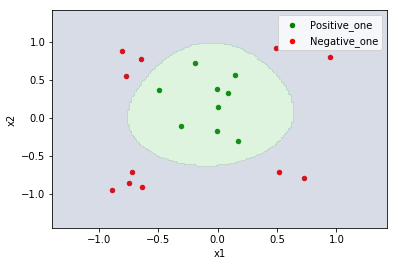

array([[ 0.491,  0.92 ],
       [-0.721, -0.71 ],
       [ 0.519, -0.715],
       [-0.775,  0.551],
       [-0.646,  0.773],
       [-0.494,  0.363],
       [-0.189,  0.718],
       [ 0.171, -0.302]])

In [26]:
# Part d
# SVM Transformation 

from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from numpy.random import rand
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import random


data1 = {'x1': [-0.494, -0.311, -0.0064, -0.0089, 0.0014, -0.189, 0.085,0.171,0.142], 'x2':[0.363,-0.101,0.374,-0.173,0.138,0.718, 0.32208,-0.302,0.568]}
label_plus_1 = pd.DataFrame(data=data1)


data2 = {'x1': [0.491,-0.892,-0.721,0.519,-0.775,-0.646,-0.803,0.944,0.724,-0.748,-0.635], 'x2': [0.920,-0.946, -0.710,-0.715,0.551,0.773,0.878,0.801,-0.795,-0.853,-0.905]}
label_minus_1 = pd.DataFrame(data = data2)

X = [[-0.494,0.363],
             [-0.311,-0.101],
             [-0.0064,0.374],
             [-0.0089,-0.173],
             [0.0014,0.138],
             [-0.189,0.718],
             [0.085,0.32208],
             [0.171,-0.302],
             [0.142,0.568],
      [0.491,0.920],
      [-0.892,-0.946],
      [-0.721,-0.710],
       [0.519,-0.715],
       [-0.775,0.551],
       [-0.646,0.773],
       [-0.803,0.878],
       [0.944,0.801],
       [0.724,-0.795],
       [-0.748,-0.853],
      [-0.635,-0.905]]

X1 = pd.DataFrame(X)

       
y = [1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]   
       
model = SVC(kernel='rbf',gamma = 1, C=1E10)
model_rbf = model.fit(X,y)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out


X_0, X_1 =X1.loc[:,0], X1.loc[:, 1]
xx, yy = make_meshgrid(X_0, X_1)

title = ('SVC with rbf kernel')

ax = label_plus_1.plot.scatter(x='x1', y='x2', color = 'green',label = 'Positive_one');
label_minus_1.plot.scatter(x='x1', y='x2', color='red', label='Negative_one', ax=ax);
plot_contours(model_rbf, xx, yy, levels =[-1,0,1] ,alpha=0.2, linestyles =['--','-','--'])
plt.show()

model_rbf.support_vectors_













In [27]:
# Comparision between part a and part c
# We can use Out-of-Sample error to choose the best one among all three. Also, we can look at the curvatures complexity
# and discuss their pattern. I'm choosing the 2nd way because I was not provided with test -set and was not asked to 
# do that

## From the figure, third degree polynomial, curvature is complex and it's overfitting the data compare to 2nd order. 
# In case of SVM, I'm using rbf kernal with gamma = 1 and very large C. The final curvature is looking to similar to 2nd
# order polynomial. But as we know that SVM has an added benifit of having a cushion 
